<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

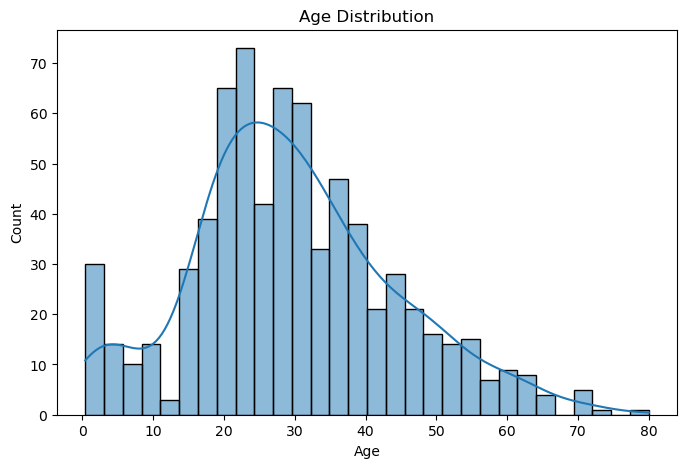

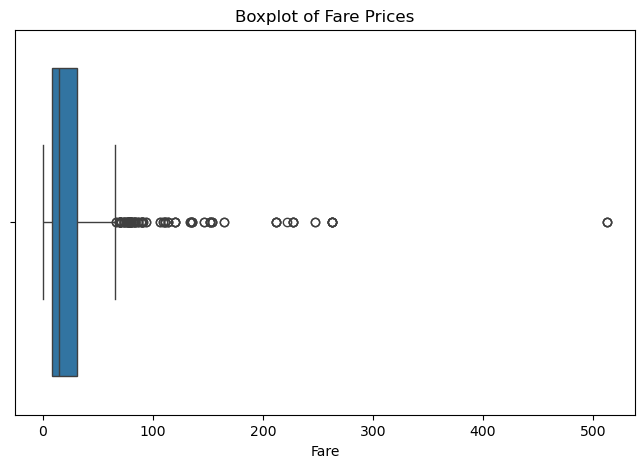

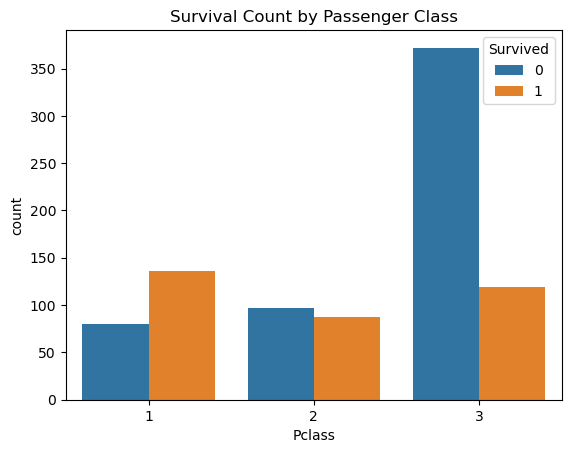

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


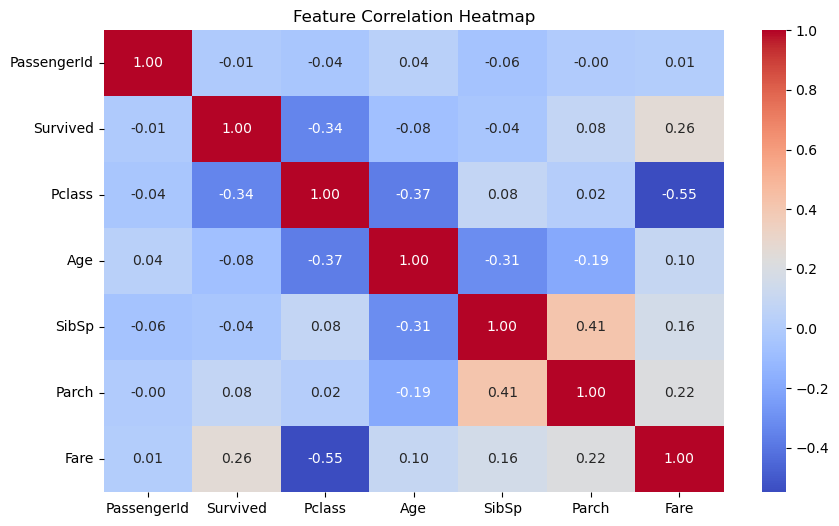

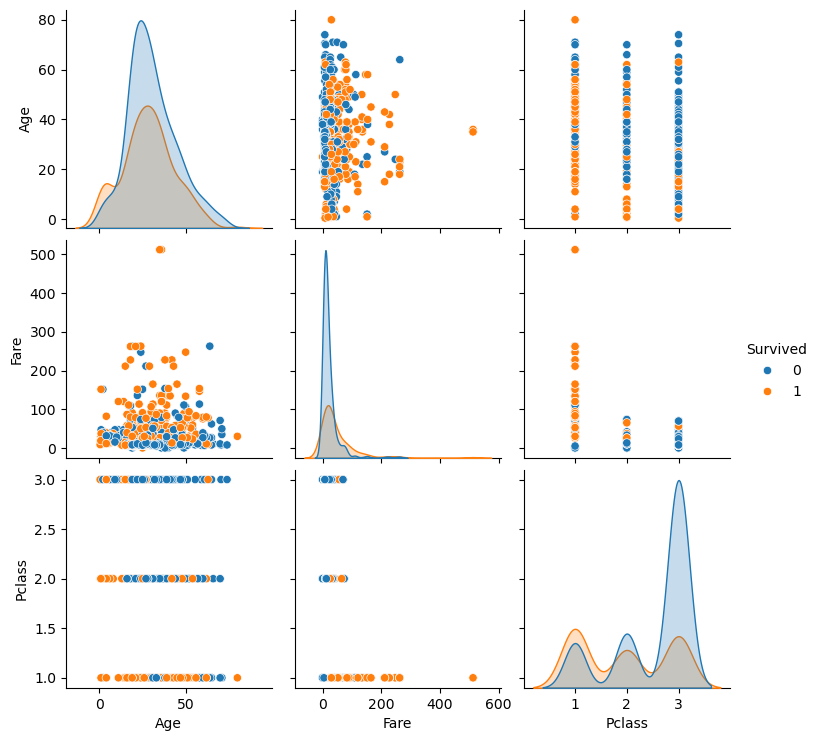


1. First-class passengers had higher survival rates.
2. Age and fare have a weak correlation.
3. Boxplots indicate outliers in fare prices.
4. Heatmap shows strong correlation between Pclass and Fare.



In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")  # Change filename if needed

# Basic exploration
print(df.info())         
print(df.describe())    
print(df.isnull().sum()) 
print(df["Survived"].value_counts()) 

# Age Distribution Analysis
- This histogram shows how age is distributed among passengers.
- Observing the age range helps understand passenger demographics.

plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot of Fare Prices")
plt.show()

# Survival rate by class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=["number"])

# Verify numeric columns
print(df_numeric.head())  # Check if dataframe is correctly filtered

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass"]], hue="Survived")
plt.show()

# Summary of findings
observations = """
1. First-class passengers had higher survival rates.
2. Age and fare have a weak correlation.
3. Boxplots indicate outliers in fare prices.
4. Heatmap shows strong correlation between Pclass and Fare.
"""
print(observations)
